In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve,auc
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
# prueba github
X = pd.read_csv('../data/processed/X.csv')
y = pd.read_csv('../data/processed/y.csv')

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10849, 11)
(2713, 11)
(10849, 1)
(2713, 1)


In [45]:
train = pd.concat([X_train, pd.DataFrame(y_train, columns=['loan_status'])], axis=1)



In [46]:
train

,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,loan_status
11676,36,15.80,210.36,6.0,42000.0,17.37,0.0,7990.0,94.0,17.0,0.000000,0
3747,36,23.76,422.36,0.0,60000.0,26.08,0.0,7801.0,19.3,57.0,1.000000,1
4911,36,6.62,122.82,10.0,70000.0,9.60,0.0,4743.0,89.5,30.0,1.590594,1
6451,36,6.03,197.84,10.0,104000.0,5.84,0.0,17066.0,24.5,29.0,3.000000,1
9548,60,24.89,760.73,10.0,65000.0,19.61,0.0,14156.0,93.1,25.0,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,36,19.05,484.20,2.0,65000.0,27.84,0.0,17445.0,61.1,17.0,0.000000,0
3264,36,13.11,246.36,10.0,150000.0,10.02,0.0,18091.0,70.7,40.0,8.000000,1
9845,36,15.31,139.27,4.0,15000.0,31.20,0.0,4328.0,92.1,21.0,0.000000,0
10799,60,20.50,214.19,4.0,62000.0,11.85,0.0,20473.0,50.7,12.0,1.590594,0


In [47]:
test = pd.concat([X_test, pd.DataFrame(y_test, columns=['loan_status'])], axis=1)

In [48]:
test

,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec,revol_bal,revol_util,total_acc,mort_acc,loan_status
1861,36,7.62,263.32,5.0,50000.0,21.10,0.0,869.0,4.8,21.0,5.0,1
11971,36,15.31,41.79,10.0,36000.0,21.77,0.0,13459.0,57.5,47.0,3.0,0
10411,36,13.11,202.49,4.0,36680.0,4.29,1.0,1459.0,15.7,16.0,1.0,0
3998,36,8.90,381.04,9.0,100000.0,8.81,0.0,9966.0,76.7,26.0,5.0,1
2686,36,8.90,444.55,10.0,100000.0,19.76,0.0,10461.0,79.2,23.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5540,36,14.33,378.58,5.0,95000.0,11.57,0.0,10292.0,61.6,23.0,1.0,1
2579,36,17.27,536.81,6.0,82000.0,13.73,0.0,16418.0,44.9,41.0,1.0,1
882,36,7.90,112.65,3.0,53000.0,13.02,0.0,2320.0,62.7,14.0,1.0,1
2576,60,19.72,421.42,10.0,63000.0,6.10,0.0,9081.0,66.8,21.0,0.0,1


In [49]:
# train.to_csv('train.csv', index=False)
# test.to_csv('test.csv', index=False)

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [51]:
log_reg = LogisticRegression(max_iter=1000)

In [53]:
cv_results = cross_val_score(log_reg, X, y, cv=10, scoring="roc_auc")
print(cv_results)
print(cv_results.mean())
print(cv_results.std())

[0.62025102 0.66078217 0.6286971  0.6274593  0.61877072 0.63023729
 0.64632008 0.64409246 0.62915829 0.65483027]
0.6360598714550133
0.01375450218952284


In [54]:
log_reg.fit(X_train_scal, y_train)

LogisticRegression(max_iter=1000)

In [55]:
y_pred = log_reg.predict(X_test_scal)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [56]:
accuracy_score(y_test, y_pred)

0.6325101363803907

In [57]:
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[790, 629],
       [368, 926]], dtype=int64)

In [58]:
precision_score(y_test, y_pred)

0.5954983922829582

In [59]:
recall_score(y_test, y_pred)

0.7156105100463679

In [60]:
f1_score(y_test, y_pred)

0.6500526500526501

In [61]:
roc_auc_score(y_test, y_pred)

0.6361703008300902

In [62]:
y_pred_proba = log_reg.predict_proba(X_test_scal)
y_pred_proba

array([[0.31814748, 0.68185252],
       [0.51215413, 0.48784587],
       [0.44830932, 0.55169068],
       ...,
       [0.3213557 , 0.6786443 ],
       [0.76530358, 0.23469642],
       [0.82359873, 0.17640127]])

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

Text(0, 0.5, 'True positive rate')

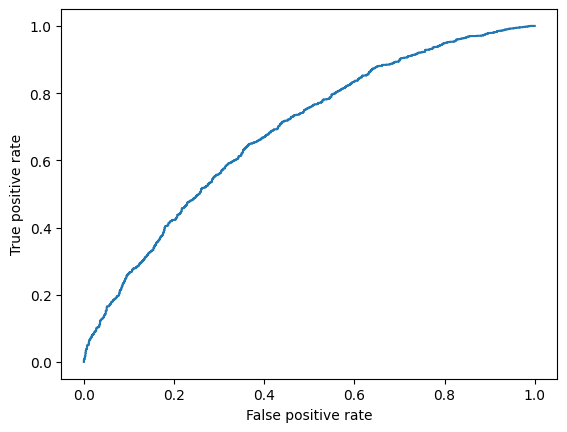

In [64]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [65]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

Text(0, 0.5, 'Precision')

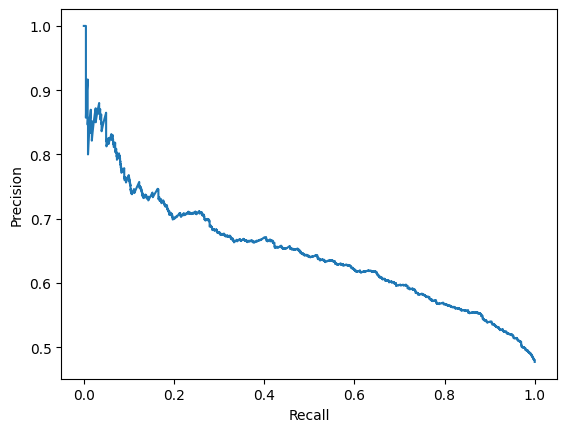

In [66]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [73]:

    
# with open('my_model_primero_logreg.pkl', "wb") as archivo_salida:
#     pickle.dump(log_reg, archivo_salida)
